<a href="https://colab.research.google.com/github/najafathima/ICTwork/blob/main/linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas
import pandas as pd
import numpy as np

In [19]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [21]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('diabetes.csv', index_col=0)

# display the first 5 rows
data.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [22]:
# display the last 5 rows
data.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [23]:
# check the shape of the DataFrame (rows, columns)
data.shape

(768, 8)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [24]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

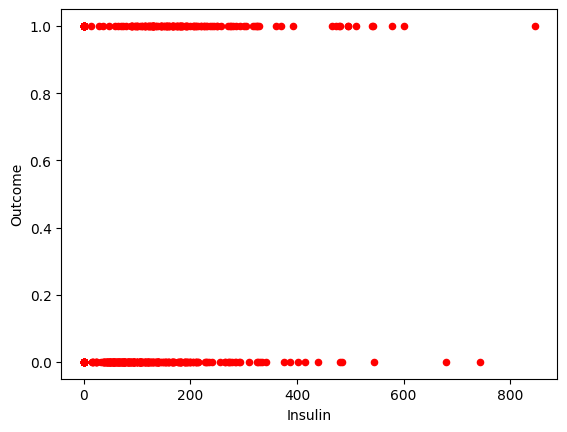

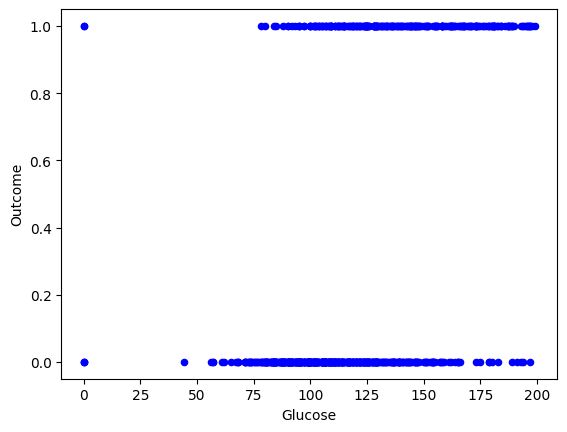

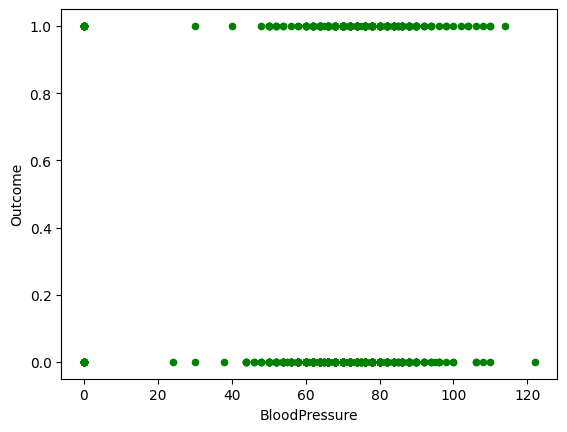

In [28]:
data.plot(kind='scatter',x='Insulin',y='Outcome',color='red')
data.plot(kind='scatter',x='Glucose',y='Outcome',color='blue')
data.plot(kind='scatter',x='BloodPressure',y='Outcome',color='green')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [36]:
# create a Python list of feature names
#feature_cols = ['Insulin', 'Glcose', 'Newspaper']

# use the list to select a subset of the original DataFrame
#X = data[feature_cols]

# equivalent command to do this in one line
X = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

# print the first 5 rows
X.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [37]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(768, 7)


In [42]:
# select a Series from the DataFrame
lab = ['Outcome']

# equivalent command that works if there are no spaces in the column name
y =  data['Outcome']



# print the first 5 values
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [41]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(768,)


## Splitting X and y into training and testing sets

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(576, 7)
(576,)
(192, 7)
(192,)
             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
7                136             74             26      135  26.0   
1                151             60              0        0  26.1   
6                109             60             27        0  25.0   
3                 61             82             28        0  34.4   
1                116             78             29      180  36.1   
...              ...            ...            ...      ...   ...   
0                165             90             33      680  52.3   
5                139             80             35      160  31.6   
5                105             72             29      325  36.9   
13                76             60              0        0  32.8   
4                 94             65             22        0  24.7   

             DiabetesPedigreeFunction  Age  
Pregnancies              

## Linear regression in scikit-learn

In [45]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [46]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)


[ 0.44369458  0.40027734  0.14598669  0.0385387   0.29915454  0.36365396
  0.38765224  0.16970823  0.24290536  0.29275407  0.41401121  0.12800069
  1.18619281  0.58239271 -0.05438185  0.63116704  0.33808461  0.35769555
  0.17265794  0.1548991   0.44778239  0.14775697  0.80793233  0.23126827
  0.07988185  0.45028123  0.27564256  0.5891329   0.14353086  0.45082064
  0.43162899  0.30896332  0.03304967  0.70802153  0.23714062  0.68360934
  0.09666504  0.25518779  0.03836278  0.45105408  0.29703952  0.13888753
 -0.05533792  0.3905335   0.09679737 -0.11120608  0.79944187  0.75724537
  0.08867313  0.18136128 -0.2938121   0.2338905   0.7211072   0.02457775
  0.55982799  0.12902805  0.5389021   0.35170444  0.57292908  0.21006311
  0.57197656 -0.22004128  0.62827727  0.27853475  0.45454631  0.16856326
 -0.27153453  0.50993669  0.52041722  0.5397731   0.81661979  0.73233311
  0.52327776 -0.1941712   0.59131238  0.22637175  0.60001302  0.35333104
  0.18212897  0.58623573  0.60277959  0.27448188  0

In [47]:
print(X_test)


             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
7                136             74             26      135  26.0   
1                151             60              0        0  26.1   
6                109             60             27        0  25.0   
3                 61             82             28        0  34.4   
1                116             78             29      180  36.1   
...              ...            ...            ...      ...   ...   
0                165             90             33      680  52.3   
5                139             80             35      160  31.6   
5                105             72             29      325  36.9   
13                76             60              0        0  32.8   
4                 94             65             22        0  24.7   

             DiabetesPedigreeFunction  Age  
Pregnancies                                 
7           

We need an **evaluation metric** in order to compare our predictions with the actual values!